In [20]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df=pd.read_csv(r"E:\AI&ML\ml datasets\homeprices_banglore.csv") 
df.sample(5)

,area,bedrooms,price
16,1180,3,48.0
7,3300,4,155.0
8,1310,3,50.0
4,1200,2,51.0
1,2600,4,120.0


In [22]:
from sklearn.preprocessing import MinMaxScaler as mms
sx=mms()
sy=mms()

In [23]:
x_s=sx.fit_transform(df.drop("price",axis="columns"))
y_s=sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

### Batch gradient descent

In [32]:
def batchgd(x,y,epochs,rate=0.01):
    number_of_features=x.shape[1]
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]
    
    cost_list=[]
    epochs_list=[]
    
    for i in range(epochs):
        y_pre=np.dot(w,x_s.T)+b
        
        w_g = -(2/total_samples)*(x.T.dot(y-y_pre))
        b_g = -(2/total_samples)*np.sum(y-y_pre)
        
        w=w-rate*w_g
        b=b-rate*b_g
        
        cost = np.mean(np.square(y-y_pre))      
        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list
            

### plt.plot(epochs_list,cost_list)

In [33]:
def sigmoid(z):
    return (1/(1+math.exp(z)))

In [34]:
def predict(area,bedrooms,w,b):
    x_s=sx.transform([[area,bedrooms]])[0]
    s_p=x_s[0]*w[0]+x_s[1]*w[1]+b
    return sy.inverse_transform([[s_p]])[0][0]

In [35]:
predict(1500,3,w,b)

C:\Users\yadee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

### Stochastic gradient descent

In [29]:
import random
random.randint(1,6)

5

In [42]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_s,y_s.reshape(y_s.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.7076862 , 0.67379818]), -0.22837800446011663, 0.0003184079274446314)

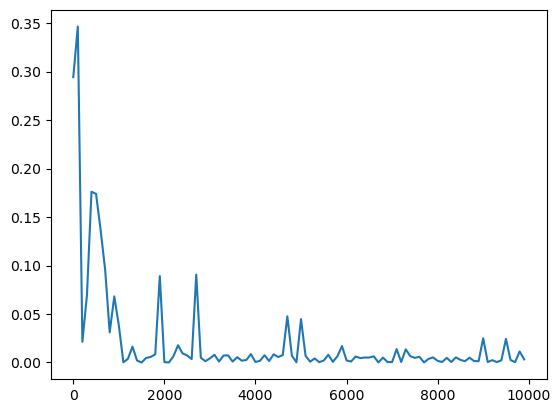

In [45]:
plt.plot(epoch_list_sgd,cost_list_sgd)

In [46]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\yadee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.69025786401895

### EXERCISE(Mini batch gradient descent)

In [47]:
#